<a href="https://colab.research.google.com/github/Davis-Tony/DS-Unit-1-Sprint-2-Statistics/blob/master/TonyDavis_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of Echocardiograms

<https://archive.ics.uci.edu/ml/datasets/Echocardiogram>

Attribute Information:

1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. age-at-heart-attack -- age in years when heart attack occurred
4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. mult -- a derivate var which can be ignored
11. name -- the name of the patient (I have replaced them with "name")
12. group -- meaningless, ignore it
13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [3]:
#Usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Establishing column names
colnames=['survival', 'still_alive', 'age_at_heart_attack', 'pericardial_effusion', 
      'fractional_shortening', 'epps', 'lvdd', 'wall_motion_score', 
      'wall_motion_index', 'mult', 'name', 'group', 'alive_at_1']

#Reading in dataset

heart_attack = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data', error_bad_lines=False)
heart_attack.columns=colnames
heart_attack.head()

b'Skipping line 50: expected 13 fields, saw 14\n'


,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epps,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0


In [5]:
#Checking shape
heart_attack.shape

(130, 13)

In [6]:
#Changing missing data to nan

heart_attack = heart_attack.replace('?', np.nan)

In [7]:
#Checking for nan
heart_attack['age_at_heart_attack'].value_counts(dropna=False)

62        10
57         8
61         8
59         7
64         7
63         7
54         6
60         6
66         5
65         5
NaN        5
70         5
55         5
68         4
73         4
56         3
69         3
67         3
78         3
50         2
52         2
58         2
79         2
46         2
72         2
77         1
47         1
51         1
85         1
71         1
75         1
81         1
35         1
53         1
62.529     1
80         1
48         1
74         1
86         1
Name: age_at_heart_attack, dtype: int64

In [8]:
#Reassigning data types
heart_attack['survival'] = heart_attack.survival.astype(float)
heart_attack['still_alive'] = heart_attack.still_alive.astype(bool)
heart_attack['age_at_heart_attack'] = heart_attack.age_at_heart_attack.astype(float)
heart_attack['pericardial_effusion'] = heart_attack.pericardial_effusion.astype(float)
heart_attack['fractional_shortening'] = heart_attack.fractional_shortening.astype(float)
heart_attack['epps'] = heart_attack.epps.astype(float)
heart_attack['lvdd'] = heart_attack.lvdd.astype(float)
heart_attack['wall_motion_score'] = heart_attack.wall_motion_score.astype(float)
heart_attack['wall_motion_index'] = heart_attack.wall_motion_index.astype(float)
heart_attack['mult'] = heart_attack.mult.astype(float)
heart_attack['alive_at_1'] = heart_attack.alive_at_1.astype(float)

In [9]:
heart_attack.dtypes

survival                 float64
still_alive                 bool
age_at_heart_attack      float64
pericardial_effusion     float64
fractional_shortening    float64
epps                     float64
lvdd                     float64
wall_motion_score        float64
wall_motion_index        float64
mult                     float64
name                      object
group                     object
alive_at_1               float64
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that Alive-at-1 is the class label. Besides that, we have continuous features and categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`1` and `0`).

For the continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are also categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [10]:
# Next import
from scipy.stats import ttest_ind

In [11]:
#Making two new dataframes
alive = heart_attack['alive_at_1']
peric = heart_attack['pericardial_effusion']

In [12]:
#Running t-test to compare
ttest_ind(alive, peric).pvalue

nan

In [13]:
#The pvalue here is very low, so more tests will have to be run to find a higher pvalue

In [14]:
heart_attack.shape

(130, 13)

In [15]:
heart_attack['alive_at_1'].value_counts()

0.0    49
1.0    24
Name: alive_at_1, dtype: int64

In [16]:
heart_attack.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epps,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,19.0,False,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
1,16.0,False,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
2,57.0,False,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
3,19.0,True,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0
4,26.0,False,68.0,0.0,0.260,5.000,4.310,12.0,1.00,0.857,name,1,0.0


In [17]:
alive = heart_attack[heart_attack['alive_at_1']==1.0]
not_alive = heart_attack[heart_attack['alive_at_1']==0.0]

In [18]:
#Checking shapes
print(alive.shape)
print(not_alive.shape)
print(heart_attack.shape)

(24, 13)
(49, 13)
(130, 13)


In [19]:
heart_attack['alive_at_1'].value_counts(dropna=False)

NaN    57
0.0    49
1.0    24
Name: alive_at_1, dtype: int64

In [20]:
#Finding means
print(alive['epps'].mean())
print(not_alive['epps'].mean())

15.896809523809523
11.073295454545457


In [21]:
#Running new ttest
ttest_ind(alive['epps'], not_alive['epps'], nan_policy='omit')

Ttest_indResult(statistic=2.5956423931198893, pvalue=0.011733341247805758)

In [22]:
#Fail to reject the null hypothesis stating there is no difference between populations.. running test with different features


In [23]:
print(alive['wall_motion_index'].mean())
print(not_alive['wall_motion_index'].mean())

1.7928260869565218
1.2741224489795915


In [24]:
ttest_ind(alive['wall_motion_index'], not_alive['wall_motion_index'], nan_policy='omit')

Ttest_indResult(statistic=5.179903670253829, pvalue=2.0410033301552332e-06)

In [25]:
#Preparing for chi-squares

In [26]:
heart_attack.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epps,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,19.0,False,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
1,16.0,False,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
2,57.0,False,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
3,19.0,True,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0
4,26.0,False,68.0,0.0,0.260,5.000,4.310,12.0,1.00,0.857,name,1,0.0


In [27]:
heart_attack.describe(exclude='number')

,still_alive,name,group
count,130,130,108
unique,2,1,2
top,False,name,2
freq,87,130,85


In [28]:
#Importing for chi square
import scipy.stats as stats

In [29]:
#Describing age_at_heart_attack
heart_attack['age_at_heart_attack'].describe()

count    125.000000
mean      62.748232
std        8.343096
min       35.000000
25%       57.000000
50%       62.000000
75%       67.000000
max       86.000000
Name: age_at_heart_attack, dtype: float64

In [30]:
#Creating bins for age_at_heart_attack
cut_points=[35, 52, 69, 86]
heart_attack['age_cats'] = pd.cut(heart_attack['age_at_heart_attack'], cut_points, labels = ['lo', 'med', 'hi'])
heart_attack['age_cats'].value_counts()

med    91
hi     24
lo      9
Name: age_cats, dtype: int64

In [31]:
#crosstab
pd.crosstab(heart_attack['alive_at_1'], heart_attack['age_cats'], normalize='index')

age_cats,lo,med,hi
alive_at_1,,,
0.0,0.040816,0.714286,0.244898
1.0,0.000000,0.695652,0.304348


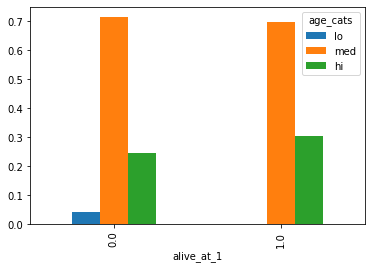

In [32]:
#Plotting xtab
pd.crosstab(heart_attack['alive_at_1'], heart_attack['age_cats'], normalize='index').plot(kind='bar');

In [34]:
#Saving crosstab
xtab = pd.crosstab(heart_attack['alive_at_1'], heart_attack['age_cats'], normalize='index')
xtab

age_cats,lo,med,hi
alive_at_1,,,
0.0,0.040816,0.714286,0.244898
1.0,0.000000,0.695652,0.304348


In [35]:
#Running chi square
stats.chi2_contingency(xtab)

(0.047497384583632826,
 0.976531088713681,
 2,
 array([[0.02040816, 0.70496894, 0.27462289],
        [0.02040816, 0.70496894, 0.27462289]]))

In [ ]:
#The null hypothesis is rejected because the pvalue is 0.977

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

It seems there's no relationship between the continuous features and whether or not the patients were alive a year later.

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



Frequentist statistics is useful when viewing information from many iterations of an event, such as coin flips.

Bayesian stats is useful when you have prior information to be used to help predict the outcome of an event.

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [ ]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.